##  Correlation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

In [2]:
df = pd.read_excel('stock_data.xlsx')
df.head()

,Date,Microsoft,Tesla,Apple,ATT
0,2020-06-11,186.270004,194.567993,83.974998,30.170000
1,2020-06-12,187.740005,187.056000,84.699997,30.500000
2,2020-06-15,188.940002,198.179993,85.747498,30.500000
3,2020-06-16,193.570007,196.425995,88.019997,30.780001
4,2020-06-17,194.240005,198.358002,87.897499,30.260000


## Methods of correlation
# Pearson
- Pearson correlation coefficient is between -1 and 1   
It measures the linear correlation (whether data is close to a linear line)  

**Strong Positive Correlation**
- Correlation coefficient is close to 1
- Data is close to line with positive slope
- x and y values increase or decrease together

**Strong Negative Correlation**
- Correlation coefficient is close to -1.
- Data is close to line with negative slope
- x and y decrease or increase in oppsite way

**No Correlation**
- Correlation coefficient is close to 0.

**Warning:** In practice it is better to removed correlated features during feature selection
- Affects the feature importances
- Does nor affect the prediction performance
- The data for both examined variables are on interval or ratio scale




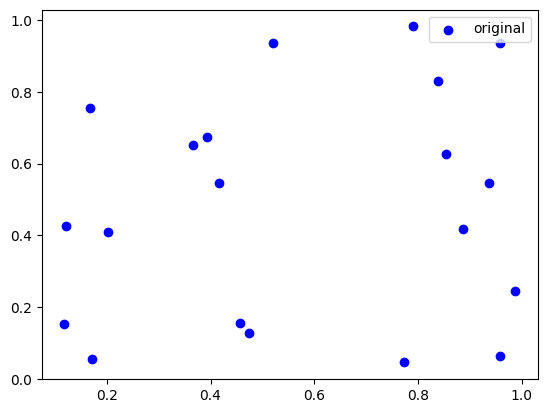

In [11]:
x = np.random.rand(20)
y = np.random.rand(20)

plt.scatter(x,y, c='b', label='original')
plt.legend()


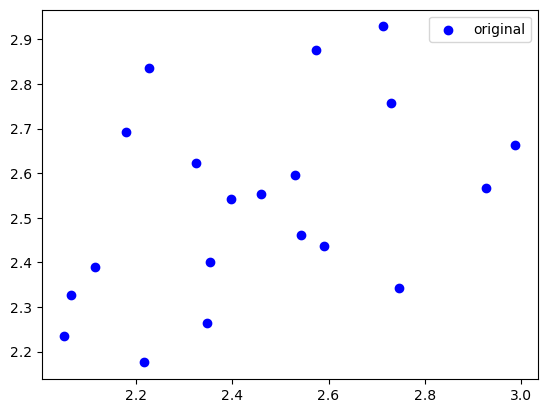

In [4]:
x = 2+np.random.rand(20) # add 2 to make the scale bigger
y = 2+np.random.rand(20)

plt.scatter(x,y, c='b', label='original')
plt.legend();

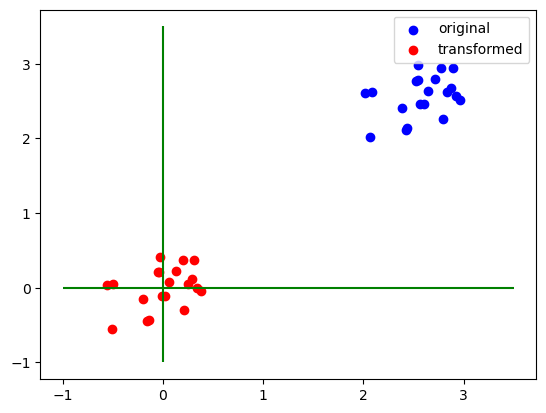

In [5]:
np.random.seed(0)
x = 2+np.random.rand(20)
y = 2+np.random.rand(20)

plt.scatter(x,y, c='b', label='original')
plt.scatter(x-x.mean(),y-y.mean(),c='r', label='transformed')
plt.hlines(0, -1,3.5,color='g')
plt.vlines(0, -1,  3.5 ,color='g')
plt.legend();

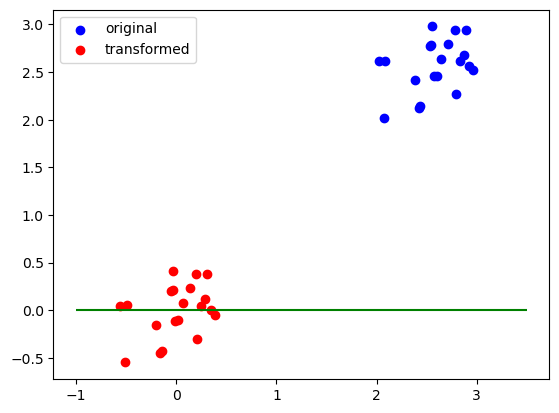

In [6]:
np.random.seed(0)
x = 2+np.random.rand(20)
y = 2+np.random.rand(20)

plt.scatter(x,y, c='b', label='original')
plt.scatter(x-x.mean(),y-y.mean(),c='r', label='transformed')
plt.hlines(0, -1, 3.5 ,color='g')
plt.legend();

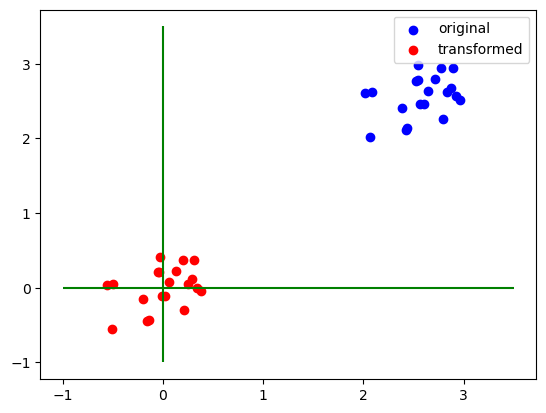

In [7]:
np.random.seed(0)

x = 2+np.random.rand(20)
y = 2+np.random.rand(20)   

plt.scatter(x, y, c='b', label='original')
plt.scatter(x-x.mean(), y-y.mean(), c='r', label='transformed')

plt.hlines(0, -1, 3.5, color='g')
plt.vlines(0, -1, 3.5, color='g')

plt.legend();

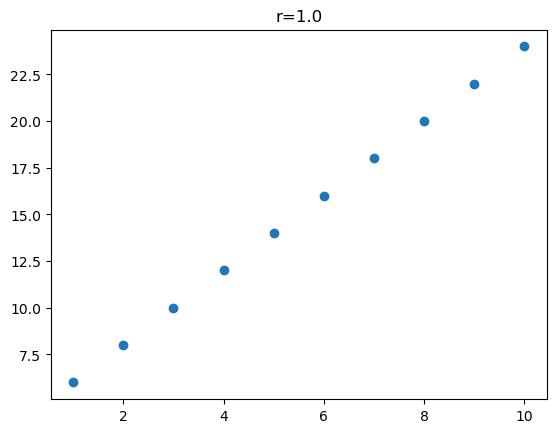

In [8]:
from scipy.stats import pearsonr   #pearson katsayisini bulmak icin indirmek lazim
x = np.linspace(1,10,10)
y = 2*x+4
plt.title(f'r={pearsonr(x,y)[0]}') #[0] is pearson coefficient [1] is p-value
plt.scatter(x,y);

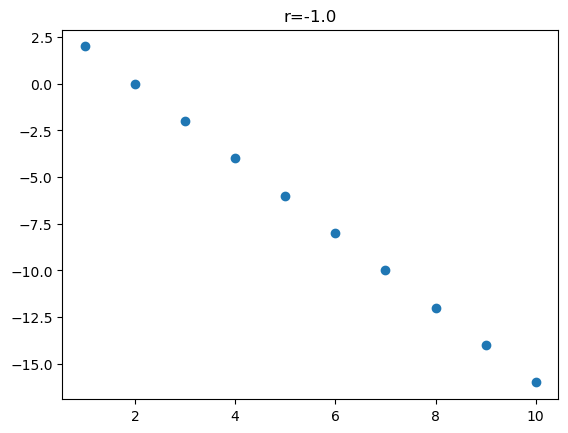

In [9]:
y = -2*x+4
plt.title(f'r={pearsonr(x,y)[0]}')
plt.scatter(x,y);

In [10]:
pearsonr(x,y)

PearsonRResult(statistic=-1.0, pvalue=0.0)

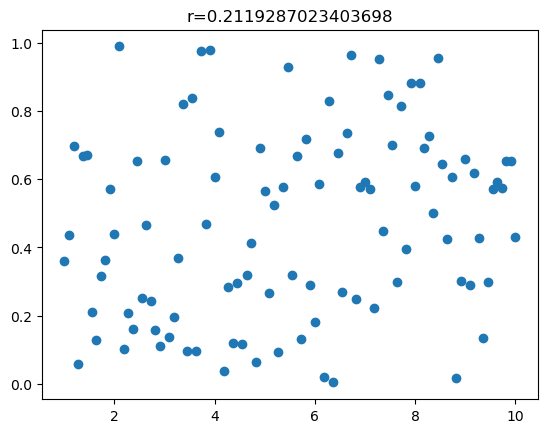

In [11]:
x = np.linspace(1,10,100)
y = np.random.rand(100)
plt.title(f'r={pearsonr(x,y)[0]}')
plt.scatter(x,y);

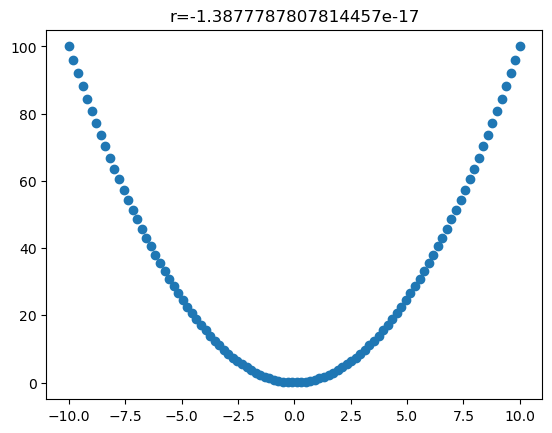

In [12]:
x = np.linspace(-10,10,100)
y = (x**2)
plt.title(f'r={pearsonr(x,y)[0]}')
plt.scatter(x,y);

## df.corr

In [18]:
df.corr()   #dataframe de correlation bulma

,Microsoft,Tesla,Apple,ATT
Microsoft,1.000000,0.673288,0.777409,-0.225879
Tesla,0.673288,1.000000,0.883727,-0.626319
Apple,0.777409,0.883727,1.000000,-0.454480
ATT,-0.225879,-0.626319,-0.454480,1.000000


### style.background_gradient(cmap='plasma')

In [19]:
df.corr().style.background_gradient(cmap='plasma')

,Microsoft,Tesla,Apple,ATT
Microsoft,1.000000,0.673288,0.777409,-0.225879
Tesla,0.673288,1.000000,0.883727,-0.626319
Apple,0.777409,0.883727,1.000000,-0.454480
ATT,-0.225879,-0.626319,-0.454480,1.000000


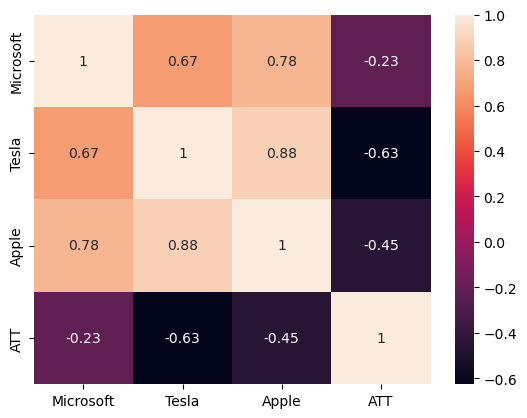

In [20]:
sns.heatmap(df.corr(),annot = True);

In [ ]:
#masking to use to get assent part of a plot.mask does not show true part

In [21]:
np.ones_like(df.corr())  #it gives us size of df. default one 1,0

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [22]:
np.ones_like(df.corr(), dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [23]:
np.triu(np.ones_like(df.corr(),dtype=bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [24]:
np.triu(np.ones_like(df.corr(),dtype=bool))[1:,:-1]# upper part is true 

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

### Code of masking sns.heatmap

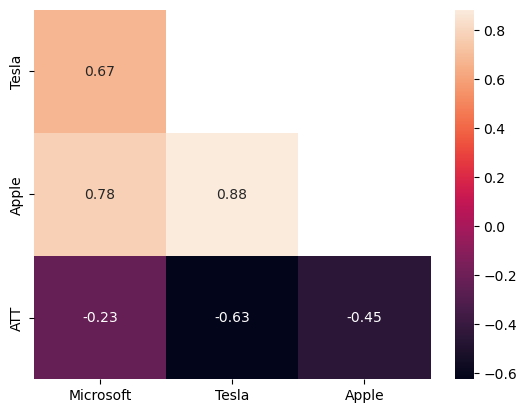

In [25]:
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr().iloc[1:,:-1] ,annot = True, mask=mask[1:,:-1]);

## SPEARMAN CORR

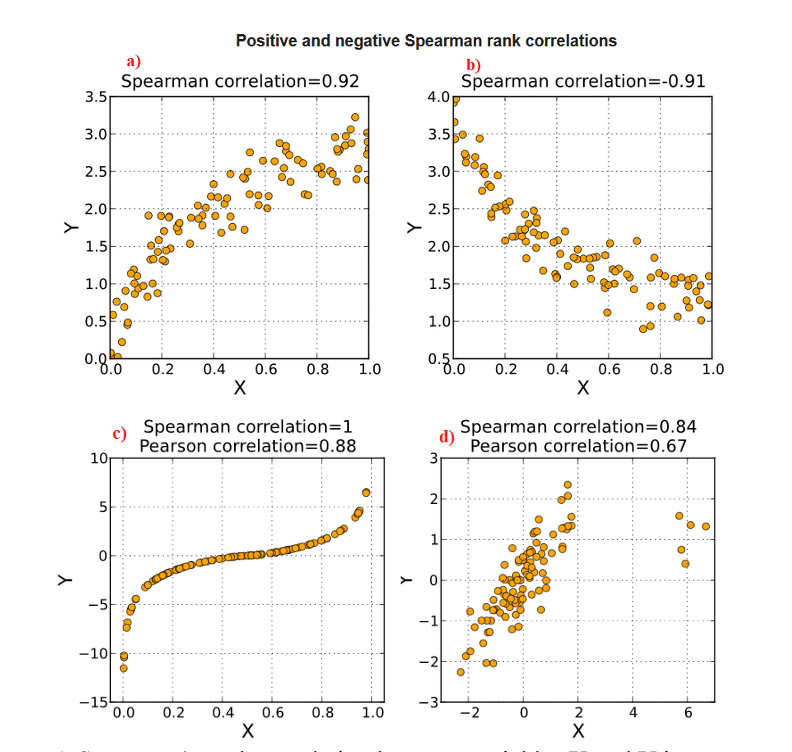

In [25]:
from IPython import display
from IPython.display import Image
image_path = 'C:/Users/btloz/JupyterNotes/SS/spearmanr.png'
display.Image(image_path)
Image(image_path, width=500, height=200)

In [31]:
#Spearman measures increasing or decreasing of your point --   pearsonr was corrrelation your point close line or not(linear)

In [39]:
df.corr(method = 'spearman')

,Microsoft,Tesla,Apple,ATT
Microsoft,1.000000,0.612919,0.802926,-0.248090
Tesla,0.612919,1.000000,0.849117,-0.669207
Apple,0.802926,0.849117,1.000000,-0.504930
ATT,-0.248090,-0.669207,-0.504930,1.000000


In [40]:
np.ones_like(df.corr(method = 'spearman'))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [41]:
a1 = np.ones_like(df.corr(method = 'spearman'), dtype=bool)
a1

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [42]:
np.triu(a1)[1: , :-1]


array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

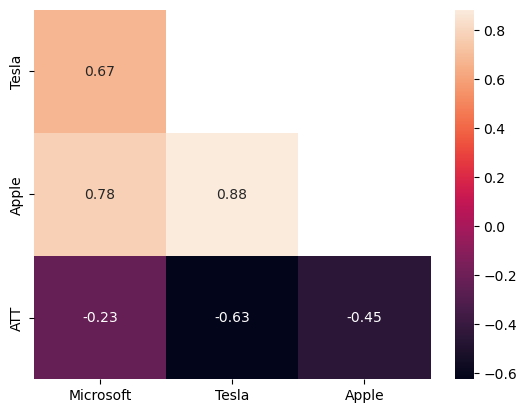

In [43]:
mask = np.triu(a1)
sns.heatmap(df.corr().iloc[1:,:-1] ,annot = True, mask=mask[1:,:-1]);

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
matrix =np.triu(df.corr())
ax =sns.heatmap(corr_matrix, annot= True, linewidths=0.5, fmt='.2f', cmap='RdBu', center=0, mask=matrix)

In [44]:

#what spearman represent?

In [45]:
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import spearmanr


In [46]:
df = pd.DataFrame({'X': [3,5,8,9,10], 'Y' :[70,20,50,10,110], 'rank(X)' :[1,2,3,4,5], 'rank(Y)':[4,2,3,1,5]})
df

,X,Y,rank(X),rank(Y)
0,3,70,1,4
1,5,20,2,2
2,8,50,3,3
3,9,10,4,1
4,10,110,5,5


In [47]:
df['di'] = df['rank(X)'] - df['rank(Y)']
df

,X,Y,rank(X),rank(Y),di
0,3,70,1,4,-3
1,5,20,2,2,0
2,8,50,3,3,0
3,9,10,4,1,3
4,10,110,5,5,0


In [48]:
di= df['di'] = df['rank(X)'] - df['rank(Y)']
di

0   -3
1    0
2    0
3    3
4    0
dtype: int64

In [49]:
df['di^2']= df['di']**2
df

,X,Y,rank(X),rank(Y),di,di^2
0,3,70,1,4,-3,9
1,5,20,2,2,0,0
2,8,50,3,3,0,0
3,9,10,4,1,3,9
4,10,110,5,5,0,0


In [50]:
from scipy.stats import spearmanr

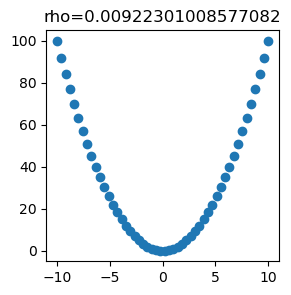

In [51]:
plt.figure(figsize=(3,3))
x = np.linspace(-10,10, 50)
y = x**2
plt.title(f'rho={spearmanr(x,y)[0]}')
plt.scatter(x,y);

In [52]:
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import spearmanr


## Comparison

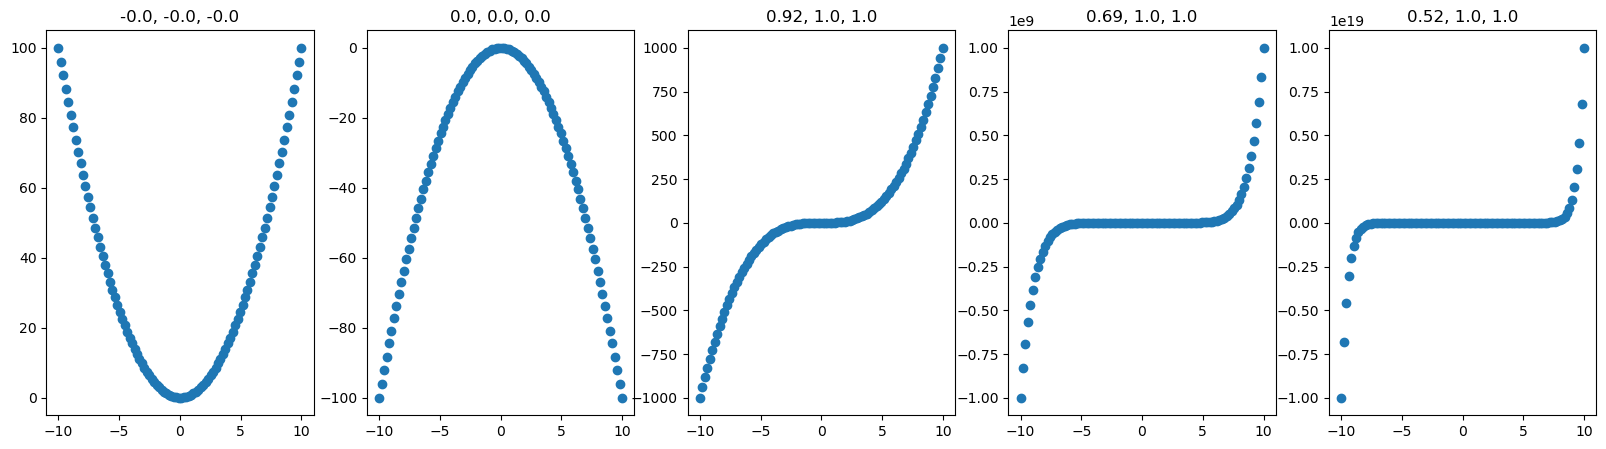

In [53]:
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
x = np.linspace(-10,10,100)
y = x**2 
plt.scatter(x,y);
plt.title( f'{round(pearsonr(x,y)[0],2)}, {round(kendalltau(x,y)[0],2)}, {round(spearmanr(x,y)[0],2)}') 

plt.subplot(1,5,2)
x = np.linspace(-10,10,100)
y = -x**2 
plt.scatter(x,y);
plt.title( f'{round(pearsonr(x,y)[0],2)}, {round(kendalltau(x,y)[0],2)}, {round(spearmanr(x,y)[0],2)}') 

plt.subplot(1,5,3)
x = np.linspace(-10,10,100)
y = x**3 
plt.scatter(x,y);
plt.title( f'{round(pearsonr(x,y)[0],2)}, {round(kendalltau(x,y)[0],2)}, {round(spearmanr(x,y)[0],2)}') 

plt.subplot(1,5,4)
x = np.linspace(-10,10,100)
y = x**9
plt.scatter(x,y);
plt.title( f'{round(pearsonr(x,y)[0],2)}, {round(kendalltau(x,y)[0],2)}, {round(spearmanr(x,y)[0],2)}') 


plt.subplot(1,5,5)
x = np.linspace(-10,10,100)
y = x**19
plt.scatter(x,y);
plt.title( f'{round(pearsonr(x,y)[0],2)}, {round(kendalltau(x,y)[0],2)}, {round(spearmanr(x,y)[0],2)}');

## Outlier Effect

P:1.0-----KT:1.0------S:0.9999999999999999
P:0.7924-----KT:1.0------S:1.0


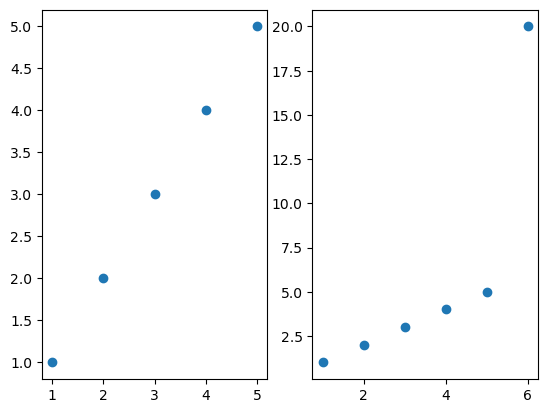

In [55]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
print(f'P:{round(pearsonr(x,y)[0],4)}-----KT:{round(kendalltau(x,y)[0],2)}------S:{spearmanr(x,y)[0]}')
plt.subplot(1,2,1)
plt.scatter(x,y);



x.append(6)
y.append(20)
print(f'P:{round(pearsonr(x,y)[0],4)}-----KT:{round(kendalltau(x,y)[0],2)}------S:{spearmanr(x,y)[0]}')
plt.subplot(1,2,2)
plt.scatter(x,y);


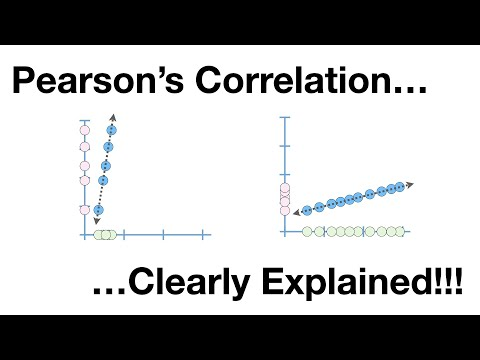

In [30]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo('xZ_z8KWkhXE')
display(video)